In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

In [6]:
train_path = 'C:\\Users\Lenovo\Documents\Github\Datasets\FER2013\FER2013\\train'
test_path = 'C:\\Users\Lenovo\Documents\Github\Datasets\FER2013\FER2013\\test'

In [7]:
print('Train:')
print(f'Number of Surprised images : {len(os.listdir(os.path.join(train_path, "surprise")))}')
print(f'Number of Afraid images : {len(os.listdir(os.path.join(train_path, "fear")))}')
print(f'Number of Disgusted images : {len(os.listdir(os.path.join(train_path, "disgust")))}')
print(f'Number of Angry images : {len(os.listdir(os.path.join(train_path, "angry")))}')
print(f'Number of Neutral images : {len(os.listdir(os.path.join(train_path, "neutral")))}')
print(f'Number of Sad images : {len(os.listdir(os.path.join(train_path, "sad")))}')
print(f'Number of Happy images : {len(os.listdir(os.path.join(train_path, "happy")))}')

print('-----------------------------------------------')
print('Test:')
print(f'Number of Surprised images : {len(os.listdir(os.path.join(test_path, "surprise")))}')
print(f'Number of Afraid images : {len(os.listdir(os.path.join(test_path, "fear")))}')
print(f'Number of Disgusted images : {len(os.listdir(os.path.join(test_path, "disgust")))}')
print(f'Number of Angry images : {len(os.listdir(os.path.join(test_path, "angry")))}')
print(f'Number of Neutral images : {len(os.listdir(os.path.join(test_path, "neutral")))}')
print(f'Number of Sad images : {len(os.listdir(os.path.join(test_path, "sad")))}')
print(f'Number of Happy images : {len(os.listdir(os.path.join(test_path, "happy")))}')

Train:
Number of Surprised images : 3171
Number of Afraid images : 4097
Number of Disgusted images : 436
Number of Angry images : 3995
Number of Neutral images : 4965
Number of Sad images : 4830
Number of Happy images : 7215
-----------------------------------------------
Test:
Number of Surprised images : 831
Number of Afraid images : 1024
Number of Disgusted images : 111
Number of Angry images : 958
Number of Neutral images : 1233
Number of Sad images : 1247
Number of Happy images : 1774


In [8]:
BATCH_SIZE = 64
IMG_SIZE = (48, 48)

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,)

train_dataset = datagen.flow_from_directory(train_path,
                                            shuffle=True,
                                            batch_size=BATCH_SIZE,
                                            target_size=IMG_SIZE,
                                            seed=42)

validation_dataset = datagen.flow_from_directory(test_path,
                                                shuffle=True,
                                                batch_size=BATCH_SIZE,
                                                target_size=IMG_SIZE,
                                                seed=42)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
for image, label in train_dataset:
    print(image.shape)
    print(label.shape)
    break

(64, 48, 48, 3)
(64, 7)


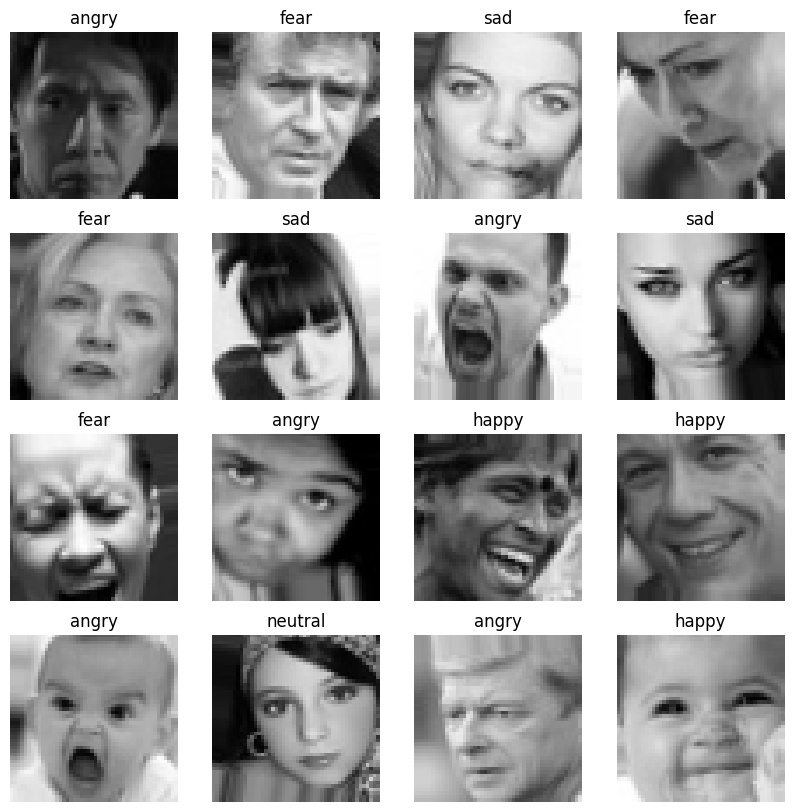

In [59]:
class_names = train_dataset.class_indices

plt.figure(figsize=(10, 10))
for images, labels in train_dataset:
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.title(list(class_names.keys())[labels[i].tolist().index(1)])
        plt.axis("off")
    break

In [74]:
model_1 = tf.keras.models.Sequential()

model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 3)))
model_1.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_1.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model_1.add(Conv2D(96, (3, 3), padding="same", activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model_1.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(256, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model_1.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(7 , activation='softmax'))

model_1.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model_1.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                 

In [78]:
#learning rate decay
from keras.callbacks import ReduceLROnPlateau
lr_reduce_1 = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.5,
            patience=10,
            verbose=1,
            mode="min",
            min_delta=0.001,
            cooldown=5,
            min_lr=0.0,
)

In [79]:
early_stop_1 = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=30,
                           mode='min')

In [80]:
n_epochs = 300
BATCH_SIZE = 64

model_history_1 = model_1.fit(train_dataset,
                          batch_size=BATCH_SIZE,
                          epochs=n_epochs,
                          validation_data=validation_dataset,
                          steps_per_epoch=train_dataset.samples // BATCH_SIZE,
                          validation_steps=validation_dataset.samples // BATCH_SIZE,
                          callbacks=[early_stop_1, lr_reduce_1],)

Epoch 1/300
448/448 [==============================] - 69s 153ms/step - loss: 0.2590 - accuracy: 0.5742 - val_loss: 0.2640 - val_accuracy: 0.5575 - lr: 0.0010
Epoch 2/300
448/448 [==============================] - 69s 155ms/step - loss: 0.2558 - accuracy: 0.5848 - val_loss: 0.2627 - val_accuracy: 0.5614 - lr: 0.0010
Epoch 3/300
448/448 [==============================] - 71s 157ms/step - loss: 0.2522 - accuracy: 0.5942 - val_loss: 0.2560 - val_accuracy: 0.5723 - lr: 0.0010
Epoch 4/300
448/448 [==============================] - 70s 157ms/step - loss: 0.2495 - accuracy: 0.5927 - val_loss: 0.2599 - val_accuracy: 0.5753 - lr: 0.0010
Epoch 5/300
448/448 [==============================] - 69s 154ms/step - loss: 0.2456 - accuracy: 0.6083 - val_loss: 0.2537 - val_accuracy: 0.5873 - lr: 0.0010
Epoch 6/300
448/448 [==============================] - 70s 155ms/step - loss: 0.2440 - accuracy: 0.6074 - val_loss: 0.2600 - val_accuracy: 0.5695 - lr: 0.0010
Epoch 7/300
448/448 [=========================

448/448 [==============================] - 69s 154ms/step - loss: 0.1627 - accuracy: 0.7531 - val_loss: 0.2529 - val_accuracy: 0.6381 - lr: 2.5000e-04
Epoch 50/300
448/448 [==============================] - 69s 153ms/step - loss: 0.1627 - accuracy: 0.7558 - val_loss: 0.2599 - val_accuracy: 0.6236 - lr: 2.5000e-04
Epoch 51/300
448/448 [==============================] - ETA: 0s - loss: 0.1616 - accuracy: 0.7580
Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
448/448 [==============================] - 69s 153ms/step - loss: 0.1616 - accuracy: 0.7580 - val_loss: 0.2589 - val_accuracy: 0.6306 - lr: 2.5000e-04
Epoch 52/300
448/448 [==============================] - 69s 155ms/step - loss: 0.1580 - accuracy: 0.7630 - val_loss: 0.2700 - val_accuracy: 0.6150 - lr: 1.2500e-04
Epoch 53/300
448/448 [==============================] - 69s 154ms/step - loss: 0.1575 - accuracy: 0.7654 - val_loss: 0.2590 - val_accuracy: 0.6242 - lr: 1.2500e-04
Epoch 54/300
448/448 [=========

In [134]:
n_epochs = 100
BATCH_SIZE = 64

model_history = model.fit(train_dataset,
                          batch_size=BATCH_SIZE,
                          epochs=n_epochs,
                          validation_data=validation_dataset,
                          steps_per_epoch=train_dataset.samples // BATCH_SIZE,
                          validation_steps=validation_dataset.samples // BATCH_SIZE,
                          callbacks=[early_stop, lr_reduce],)

Epoch 1/100
448/448 [==============================] - 2134s 5s/step - loss: 0.4085 - accuracy: 0.2184 - val_loss: 0.3892 - val_accuracy: 0.2499 - lr: 0.0010
Epoch 2/100
448/448 [==============================] - 1578s 4s/step - loss: 0.3921 - accuracy: 0.2519 - val_loss: 0.3808 - val_accuracy: 0.2662 - lr: 0.0010
Epoch 3/100
448/448 [==============================] - 1276s 3s/step - loss: 0.3721 - accuracy: 0.3195 - val_loss: 0.3413 - val_accuracy: 0.3820 - lr: 0.0010
Epoch 4/100
448/448 [==============================] - 1330s 3s/step - loss: 0.3400 - accuracy: 0.3968 - val_loss: 0.3126 - val_accuracy: 0.4436 - lr: 0.0010
Epoch 5/100
448/448 [==============================] - 1247s 3s/step - loss: 0.3188 - accuracy: 0.4486 - val_loss: 0.3029 - val_accuracy: 0.4763 - lr: 0.0010
Epoch 6/100
448/448 [==============================] - 1410s 3s/step - loss: 0.3038 - accuracy: 0.4826 - val_loss: 0.2888 - val_accuracy: 0.5091 - lr: 0.0010
Epoch 7/100
448/448 [==============================]

448/448 [==============================] - 1016s 2s/step - loss: 0.1837 - accuracy: 0.7218 - val_loss: 0.2452 - val_accuracy: 0.6290 - lr: 1.0000e-05
Epoch 51/100
448/448 [==============================] - 1030s 2s/step - loss: 0.1832 - accuracy: 0.7210 - val_loss: 0.2475 - val_accuracy: 0.6208 - lr: 1.0000e-05
Epoch 52/100
448/448 [==============================] - 1052s 2s/step - loss: 0.1838 - accuracy: 0.7200 - val_loss: 0.2458 - val_accuracy: 0.6254 - lr: 1.0000e-05
Epoch 53/100
448/448 [==============================] - 1037s 2s/step - loss: 0.1823 - accuracy: 0.7247 - val_loss: 0.2476 - val_accuracy: 0.6172 - lr: 1.0000e-05
Epoch 54/100
448/448 [==============================] - 1027s 2s/step - loss: 0.1821 - accuracy: 0.7230 - val_loss: 0.2455 - val_accuracy: 0.6268 - lr: 1.0000e-05


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


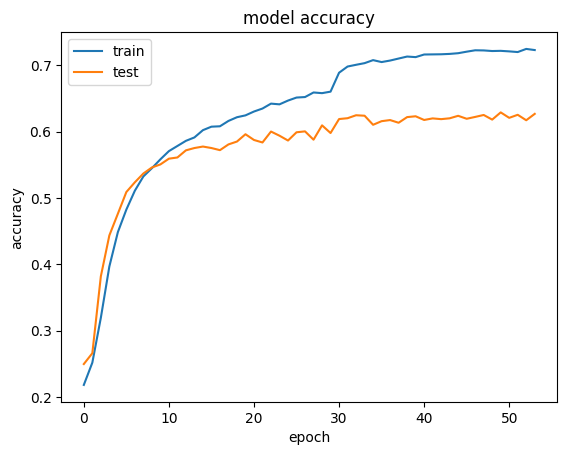

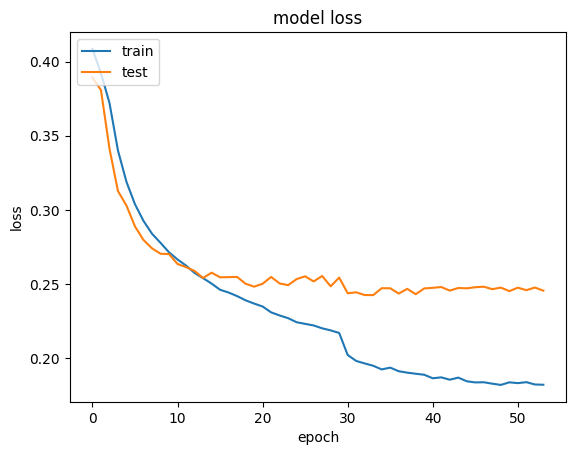

In [136]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
n_epochs = 30

MobileNet_history = MobileNet_model.fit(train_dataset,
                                        batch_size=BATCH_SIZE,
                                        epochs=n_epochs,
                                        validation_data=validation_dataset,
                                        steps_per_epoch=train_dataset.samples // BATCH_SIZE,
                                        validation_steps=validation_dataset.samples // BATCH_SIZE,
                                        callbacks=[early_stop],)

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
model_1 = tf.keras.models.Sequential()

model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=IMG_SHAPE))
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_1.add(MaxPool2D())
model_1.add(BatchNormalization())
model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_1.add(MaxPool2D())
model_1.add(BatchNormalization())
model_1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D())
model_1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(4096, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(7, activation='softmax'))

In [ ]:
model